
# Loss function for a classification tree


1.  Mis-classification error
2.  Gini index
3.  Cross-entropy





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# p_vec = np.linspace(0.0, 1.0, num=500)
# mis_cl_error_vec = np.minimum(1-p_vec, p_vec)
# gini_vec = 2*np.multiply(p_vec, 1-p_vec)
# #p_vec = p_vec[1:-1]
# cross_entropy_vec = -np.multiply(p_vec, np.log(p_vec))- np.multiply(1-p_vec, np.log(1-p_vec))
# plt.plot(p_vec, mis_cl_error_vec, '-')
# plt.plot(p_vec, gini_vec, '-')
# plt.plot(p_vec, cross_entropy_vec)
# plt.legend(['Mis-classification error', 'Gini index', 'Cross entropy'] )
# plt.xlabel('p')
# plt.grid('off')
# plt.savefig('LossFuncTree.png')

# Numerical Example on Iris Data
## Decision Tree 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
# load iris data
iris = load_iris()  
# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
display(df.head()) ################

############   remove the 3rd and 4th fields from the database
# iris.data = iris.data.T[:-1].T
# iris.feature_names = iris.feature_names[:-1]

max_depth = 2   # 3

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

clf_dt = DecisionTreeClassifier( max_depth = max_depth, criterion = 'gini', random_state=0)
clf_dt = clf_dt.fit(X_train, y_train) 
y_test_est = clf_dt.predict(X_test)

cross_val_score(clf_dt, iris.data, iris.target, cv=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.86666667, 1.        , 1.        , 1.        ])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
!pip install graphviz
import graphviz
from graphviz import Graph
from sklearn import tree
dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                     feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph.render("max_depth_iris") #################  saved to laptop download folder


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'max_depth_iris.pdf'

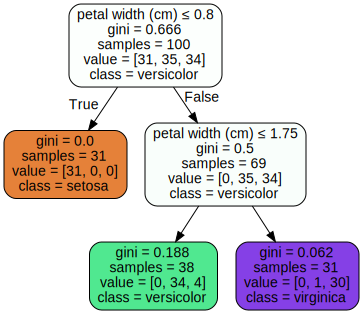

In [ ]:
graph

In [ ]:
import os
print( os.getcwd() )
from google.colab import files
files.download( "/content/max_depth_iris.pdf" ) #############  create a pdf file on you laptop in the download folder

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create confusion matrix
pd.crosstab(y_test, y_test_est, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,19,0,0
1,0,15,0
2,0,1,15


Confusion matrix, without normalization
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Normalized confusion matrix
[[1.     0.     0.    ]
 [0.     1.     0.    ]
 [0.     0.0625 0.9375]]


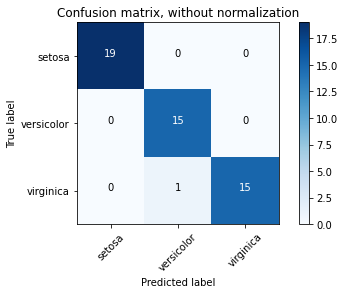

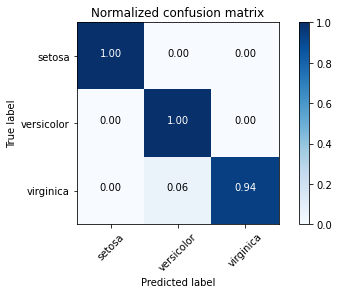

In [ ]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b = 0)

## The code for the function plot_confusion_matrix() is attributed to http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# Plot non-normalized confusion matrix
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_test, y_test_est)
plt.figure()
plot_confusion_matrix(cm, classes= iris.target_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, classes= iris.target_names, normalize=True, title='Normalized confusion matrix')

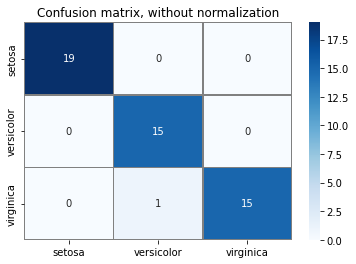

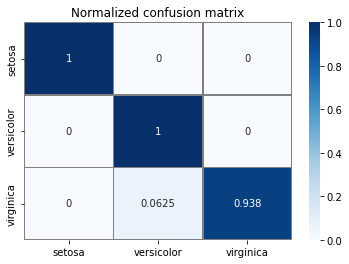

In [ ]:
################
import seaborn as sns

cm_df = pd.DataFrame(cm, index=iris.target_names, columns=iris.target_names)
sns.heatmap(cm_df, annot=True, fmt='0.3G', linewidths=.5, cmap="Blues", linecolor='gray')
plt.title('Confusion matrix, without normalization')
plt.show()

cm_normalized = pd.DataFrame(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], index=iris.target_names, columns=iris.target_names)
sns.heatmap(cm_normalized, annot=True, fmt='0.3G', linewidths=.5, cmap="Blues", linecolor='gray')
plt.title('Normalized confusion matrix')
plt.show()

In [ ]:
# View the importance scores
print(list(zip(iris.feature_names, clf_dt.feature_importances_)))

[('sepal length (cm)', 0.0), ('sepal width (cm)', 0.0), ('petal length (cm)', 0.0), ('petal width (cm)', 1.0)]


In [ ]:
clf_dt.feature_importances_

array([0., 0., 0., 1.])

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

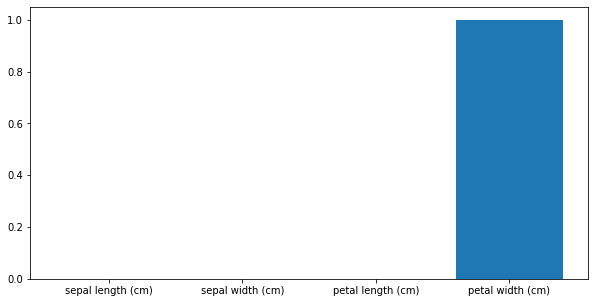

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(iris.feature_names, clf_dt.feature_importances_)
plt.show()

## Random Forest
https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/




In [ ]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(0)

# Create a random forest Classifier. 
clf_rf = RandomForestClassifier(n_estimators = 20, max_depth = max_depth, criterion = 'gini', n_jobs=2, random_state=0)

# Train the Classifier to take the training input (X_train) and learn how they relate
# to the training output y_train (the species)
clf_rf = clf_rf.fit(X_train, y_train)
# Apply the Classifier we trained to the test data (X_test)
y_test_est_rf = clf_rf.predict(X_test)

In [ ]:
clf_rf.predict_proba(X_test)[0:10]

array([[0.02376154, 0.86951727, 0.10672119],
       [0.77126154, 0.18421011, 0.04452835],
       [0.        , 0.07868305, 0.92131695],
       [0.02376154, 0.86951727, 0.10672119],
       [0.01267316, 0.53163726, 0.45568958],
       [0.95531915, 0.03297872, 0.01170213],
       [0.02376154, 0.86951727, 0.10672119],
       [0.        , 0.10368305, 0.89631695],
       [0.02376154, 0.86951727, 0.10672119],
       [0.02376154, 0.86951727, 0.10672119]])

In [ ]:
# Create confusion matrix
pd.crosstab(y_test, y_test_est_rf, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,19,0,0
1,0,15,0
2,0,0,16


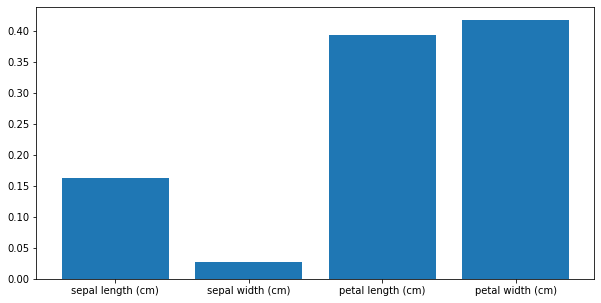

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(iris.feature_names, clf_rf.feature_importances_)
plt.show()

Confusion matrix, without normalization
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


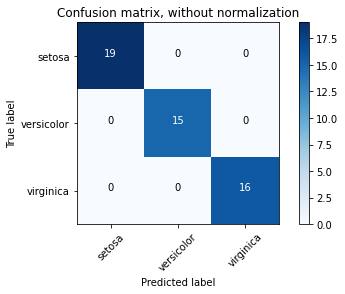

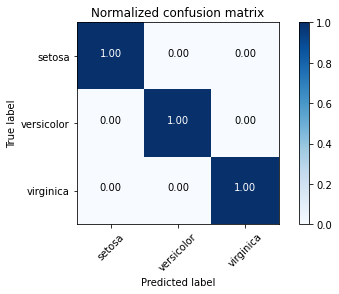

In [ ]:
cm_rf =  confusion_matrix(y_test, y_test_est_rf)
plt.figure()
plot_confusion_matrix(cm_rf, classes= iris.target_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm_rf, classes= iris.target_names, normalize=True, title='Normalized confusion matrix')

# Gradient Boosting Tree

In [ ]:
# Load scikit's random forest classifier library
from sklearn.ensemble import GradientBoostingClassifier

# Set random seed
np.random.seed(0)

# Create a random forest Classifier. 
clf_gbt = GradientBoostingClassifier(max_depth = max_depth)


# Train the Classifier to take the training input (X_train) and learn how they relate
# to the training output y_train (the species)
clf_gbt.fit(X_train, y_train)
# Apply the Classifier we trained to the test data (X_test)
y_test_est_gbt = clf_rf.predict(X_test)

Confusion matrix, without normalization
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


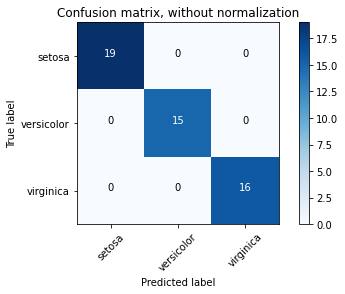

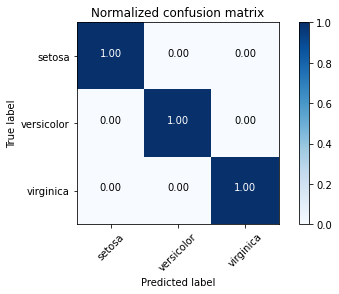

In [ ]:
cm_gbt = confusion_matrix(y_test, y_test_est_gbt)
plt.figure()
plot_confusion_matrix(cm_gbt, classes= iris.target_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm_gbt, classes= iris.target_names, normalize=True, title='Normalized confusion matrix')

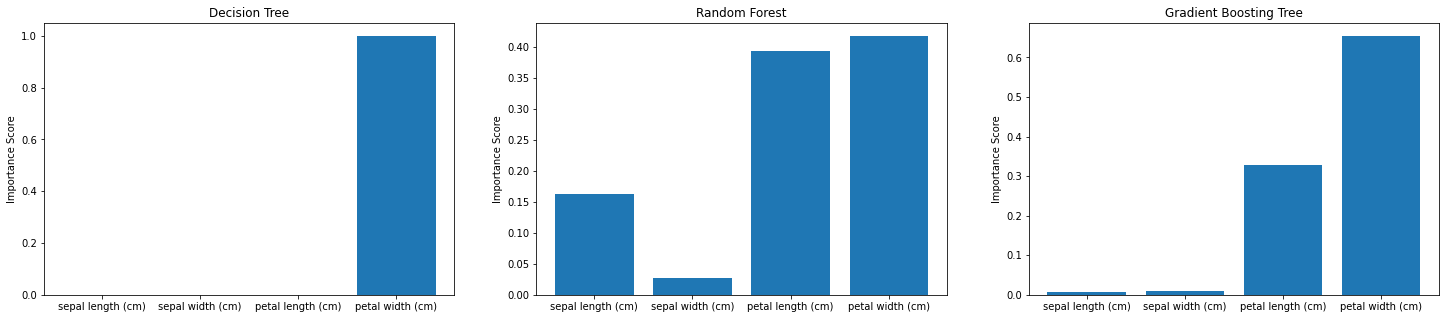

In [ ]:
from pylab import *

f = plt.figure(figsize=(25, 5))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.bar(iris.feature_names, clf_dt.feature_importances_)
ax.set_title('Decision Tree')
ax.set_ylabel('Importance Score')

ax2.bar(iris.feature_names, clf_rf.feature_importances_)
ax2.set_title('Random Forest')
ax2.set_ylabel('Importance Score')

ax3.bar(iris.feature_names, clf_gbt.feature_importances_)
ax3.set_title('Gradient Boosting Tree')
ax3.set_ylabel('Importance Score')

plt.show()

In [ ]:
clf_gbt.feature_importances_

array([0.00673465, 0.0104714 , 0.32858839, 0.65420556])